## Taller de repaso - Estadística Aplicada
***

In [1]:
import sys
sys.path.insert(0, "../resources/")

#------------ Miguel's statistics ---------#

import mstats as ms

#------------------------------------------#

In [17]:
import scipy.stats as ss
import numpy as np

***
***

### 1.
Se tienen los datos para Vinnie's Video Village.

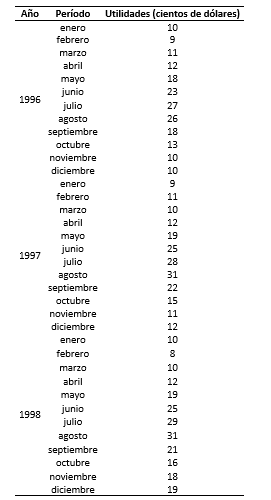


**a)** A simple vista que puede deducir de los datos.

**b)** Calcule el promedio móvil para 12 periodos. ¿Cuál sería la proyección para enero de 1999?

**c)** ¿La proyección encontrada incluye el componente estacional?
***

**a) A simple vista que puede deducir de los datos.** 

Se logra apreciar que los datos se comportan de manera estacional, pues se nota que a principio de año las ventas son muy bajas, y mientras que transcurre el año aumentan, y vuelven a caer cuando llega el fin de año.

**b) Calcule el promedio móvil para 12 periodos. ¿Cuál sería la proyección para enero de 1999?**

In [2]:
x_vinnies = [
    10, 9, 11, 12, 18, 23, 27, 26, 18, 13, 10, 10, 9, 11, 10, 12, 19, 
    25, 28, 31, 22, 15, 11, 12, 10, 8, 10, 12, 19, 25, 29, 31, 21, 16, 
    18, 19
]

t_vinnies = list(range(1, len(x_vinnies) + 1))

N_vinnies = 12

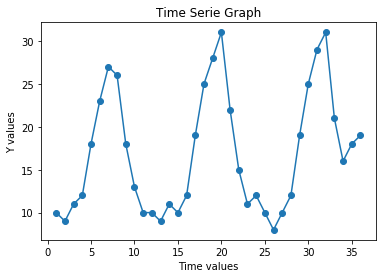

In [3]:
ms.graph.timeserie(x_vinnies, t_vinnies)

In [4]:
rm_vinnies = ms.timeseries.running_mean(x_vinnies, N_vinnies)
rm_vinnies

[15.541666666666668,
 15.583333333333332,
 15.625,
 15.583333333333336,
 15.625000000000004,
 15.75,
 15.875,
 16.125000000000007,
 16.5,
 16.75,
 16.875,
 17.0,
 17.125,
 17.041666666666657,
 16.91666666666667,
 16.916666666666686,
 16.916666666666686,
 16.916666666666686,
 16.958333333333343,
 17.0,
 16.958333333333343,
 16.958333333333343,
 17.291666666666657,
 17.875]

**R//** La proyección esperada para enero de 1999 según nuestro promedio móvil, sería de 17.875 cientos de dólares en utilidades.

**c) ¿La proyección encontrada incluye el componente estacional?** 

In [5]:
t_rm = list(range(1, len(rm_vinnies) + 1))

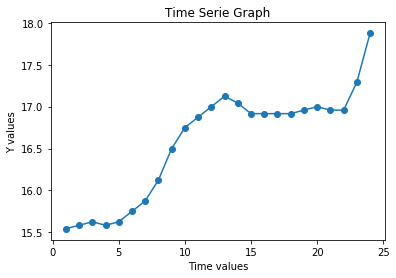

In [6]:
ms.graph.timeserie(rm_vinnies, t_rm)

**R//** Como se puede apreciar, luego de aplicar la técnica de suavizamiento de promedio móvil para 12 periodos, se logra eliminar el componente estacional de la serie; por lo que se puede decir que ésta proyección encontrada no está siendo afectada por el componente estacional.

***
***

### 2.
Los economistas han sostenido durante mucho tiempo que la demanda de dinero por una
comunidad se ve afectada por 1) el nivel de ingreso y 2) la tasa de interés. A medida que el
ingreso aumenta, las personas desean guardar más dinero para facilitar el incremento de
sus transacciones diarias. A medida que la tasa de interés aumenta, las personas deciden
mantener menos dinero debido a la oportunidad de invertirlo a una tasa de interés más
elevada.
Un economista del gobierno hace regresión de la demanda de dinero (D), el ingreso (I) y
las tasas de interés (R), en donde D se expresa en cientos de dólares e I en miles de
dólares. El modelo es:

$$\hat{D} ̂= 0.44+5.49I+6.4R$$

Una tabla parcial ANOVA:

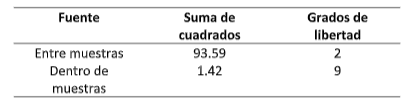

Si el error estándar del coeficiente para I es 1.37 y el de R es 43.6, determine cual variable
es (o cuales variables son) significante al nivel del 1%. Plantee la hipótesis, la regla de
decisión y la conclusión.

### Ingreso (I)

* **Nivel de significancia**

In [7]:
sign_ingreso = 0.01

* **Plantear hipótesis**

$H_0 : β_1 = 0$ *El ingreso no contribuye significativamente al poder explicativo del modelo.*

$H_A : β_1 ≠ 0$ *El ingreso contribuye significativamente al poder explicativo del modelo.*

* **Valores críticos**

In [8]:
df_ingreso = 9

In [9]:
crit_ingreso = ms.hypothesis.crit_val_t(df_ingreso, sign_ingreso, 'two')
crit_ingreso

(-3.2498355440153697, 3.2498355440153697)

* **Estadístico de prueba (T)**

$$t = \frac{b_1 - β_1}{S_{b_1}}$$

In [11]:
b_ingreso = 5.49
beta_ingreso = 0
sb_ingreso = 1.37

In [15]:
t_ingreso = ms.multiregr.t_regression(b_ingreso, beta_ingreso, sb_ingreso)
t_ingreso

4.007299270072992

* **Decisión**

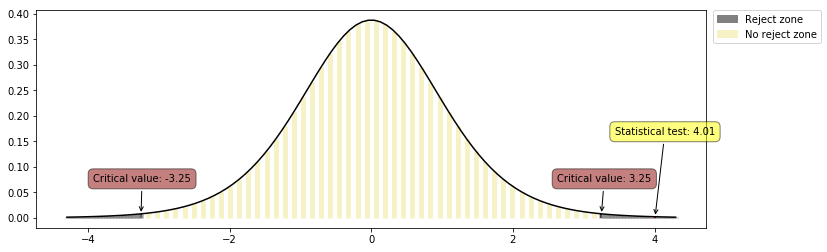

In [18]:
distr_ingreso = ss.t(df_ingreso)
ms.graph.hypothesis(distr_ingreso, t_ingreso, sign_ingreso, 'two')

**SI se rechaza la hipótesis nula** Dado que el estadístico de prueba *4.007299270072992* es **mayor** que el valor crítico calculado *3.2498355440153697*. Por lo que cae en la zona de **RECHAZO**.

* **Conclusión**

Entonces, se puede concluir que la variable independiente **ingreso** si contribuye significativamente al valor explicativo del modelo.

***

### Tasas de interés (R)

* **Nivel de significancia**

In [20]:
sign_tasas = 0.01

* **Plantear hipótesis**

$H_0 : β_2 = 0$ *Las tasas de interés no contribuyen significativamente al poder explicativo del modelo.*

$H_A : β_2 ≠ 0$ *Las tasas de interés contribuyen significativamente al poder explicativo del modelo.*

* **Valores críticos**

In [21]:
df_tasas = 9

In [22]:
crit_tasas = ms.hypothesis.crit_val_t(df_tasas, sign_tasas, 'two')
crit_tasas

(-3.2498355440153697, 3.2498355440153697)

* **Estadístico de prueba (T)**

$$t = \frac{b_2 - β_2}{S_{b_2}}$$

In [23]:
b_tasas = 6.4
beta_tasas = 0
sb_tasas = 43.6

In [24]:
t_tasas = ms.multiregr.t_regression(b_tasas, beta_tasas, sb_tasas)
t_tasas

0.14678899082568808

* **Decisión**

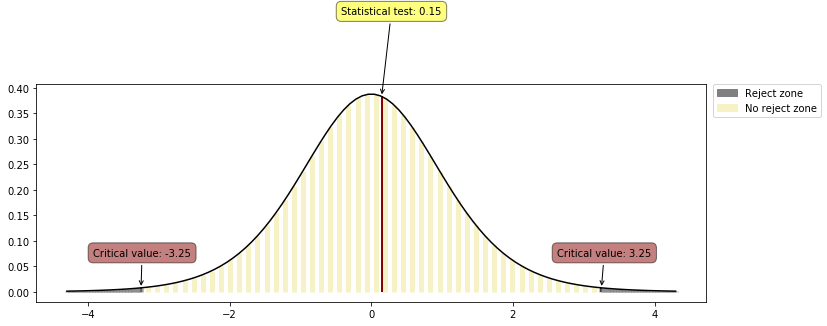

In [25]:
distr_tasas = ss.t(df_tasas)
ms.graph.hypothesis(distr_tasas, t_tasas, sign_tasas, 'two')

**NO se rechaza la hipótesis nula**. Dado que el estadístico de prueba *0.14678899082568808* no es **mayor/menor** que los estadísticos de prueba calculados *(-3.2498355440153697, 3.2498355440153697)*. Por lo que cae en la zona de **NO RECHAZO**.

* **Conclusión**

Entonces, se puede decir que la variable independiente de las **tasas de interés** no contribuye significativamente al valor explicativo del modelo.

***
***

### 3.
Con base en las cifras presentadas por el servicio de renta interna (SRI), un grupo nacional
de ciudadanos ha expresado su preocupación por que el presupuesto para éste no sea
utilizado efectivamente. El SRI argumentó que el incremento en el número de
contribuyentes que presentan su declaración de renta explica los problemas de
presupuesto. A continuación se proporcionan los datos:

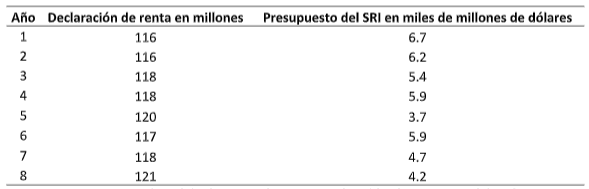

**a.** Construya el modelo de regresión. ¿Parece plausible el argumento del SRI?

**b.** Calcule e interprete el coeficiente de determinación.

**c.** Calcule e interprete el error estándar de estimación.
***

**a. Construya el modelo de regresión. ¿Parece plausible el argumento del SRI?**

In [28]:
y_presupuesto = [6.7, 6.2, 5.4, 5.9, 3.7, 5.9, 4.7, 4.2] # Variable dependiente
x_declaracion = [116, 116, 118, 118, 120, 117, 118, 121] # Variable independiente

In [29]:
model_sri = ms.linregr.regression(x_declaracion, y_presupuesto)
model_sri.shape

'ÿ = 68.09 + -0.53x'

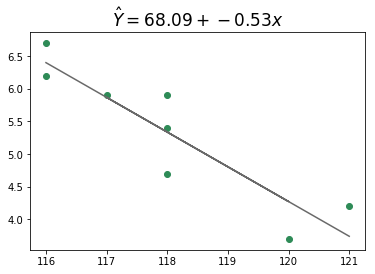

In [30]:
ms.graph.linregr(x_declaracion, y_presupuesto)

Lo primero que se puede observar esque la relación que tiene el presupuesto del SRI con respecto al dinero recaudado por la declaración de renta es **inversa**; lo cual no tiene mucho sentido, pues a medida que se reunen más fondos a razón de la declaración de renta, el SRI debería tener un mayor presupuesto.

Entonces, el argumento que da el SRI de que el incremento en el número de contribuyentes que presentan su declaración de renta explica los problemas de presupuesto, **es verdadero**, cuando se aumenta el dinero recaudado por la declaración de renta, disminuye el presupuesto del SRI.

**b. Calcule e interprete el coeficiente de determinación.**

In [32]:
r2_sri = ms.linregr.get_r2(x_declaracion, y_presupuesto)
r2_sri

0.8167051980014526

El coeficiente de determinación para los datos analizados es de **0.8167051980014526**. Lo que establece que el 81.6% del cambio en el presupuesto del SRI se explica mediante un cambio en el dinero recaudado por la declaración de renta del país.

**c. Calcule e interprete el error estándar de estimación.**

In [33]:
se_sri = ms.linregr.get_se(x_declaracion, y_presupuesto)
se_sri

0.4824377805697536

El error estándar de estimación de los datos analizados es de **0.4824377805697536**. Lo que nos dice que en cada valor de la recta de regresión calculada, se considera un error de 0.48 unidades por encima y por debajo.